<a href="https://colab.research.google.com/github/GECK202/Colab/blob/main/p01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Testing.csv to Testing (1).csv
Saving Training.csv to Training (1).csv
User uploaded file "Testing.csv" with length 13781 bytes
User uploaded file "Training.csv" with length 1380256 bytes


In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
df_train = pd.read_csv("Training.csv")
df_test = pd.read_csv("Testing.csv")

In [ ]:
df_train.drop(df_train.columns[[133]], axis=1, inplace=True)

In [ ]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,Psoriasis


In [ ]:
df_test.mean().sort_values(ascending=False)

vomiting                    0.404762
fatigue                     0.404762
high_fever                  0.285714
loss_of_appetite            0.238095
nausea                      0.238095
                              ...   
foul_smell_of urine         0.023810
continuous_feel_of_urine    0.023810
passage_of_gases            0.023810
cramps                      0.023810
fluid_overload              0.000000
Length: 132, dtype: float64

In [ ]:
df_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bronchial Asthma


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56c38fb6d0>,
      dtype=object)

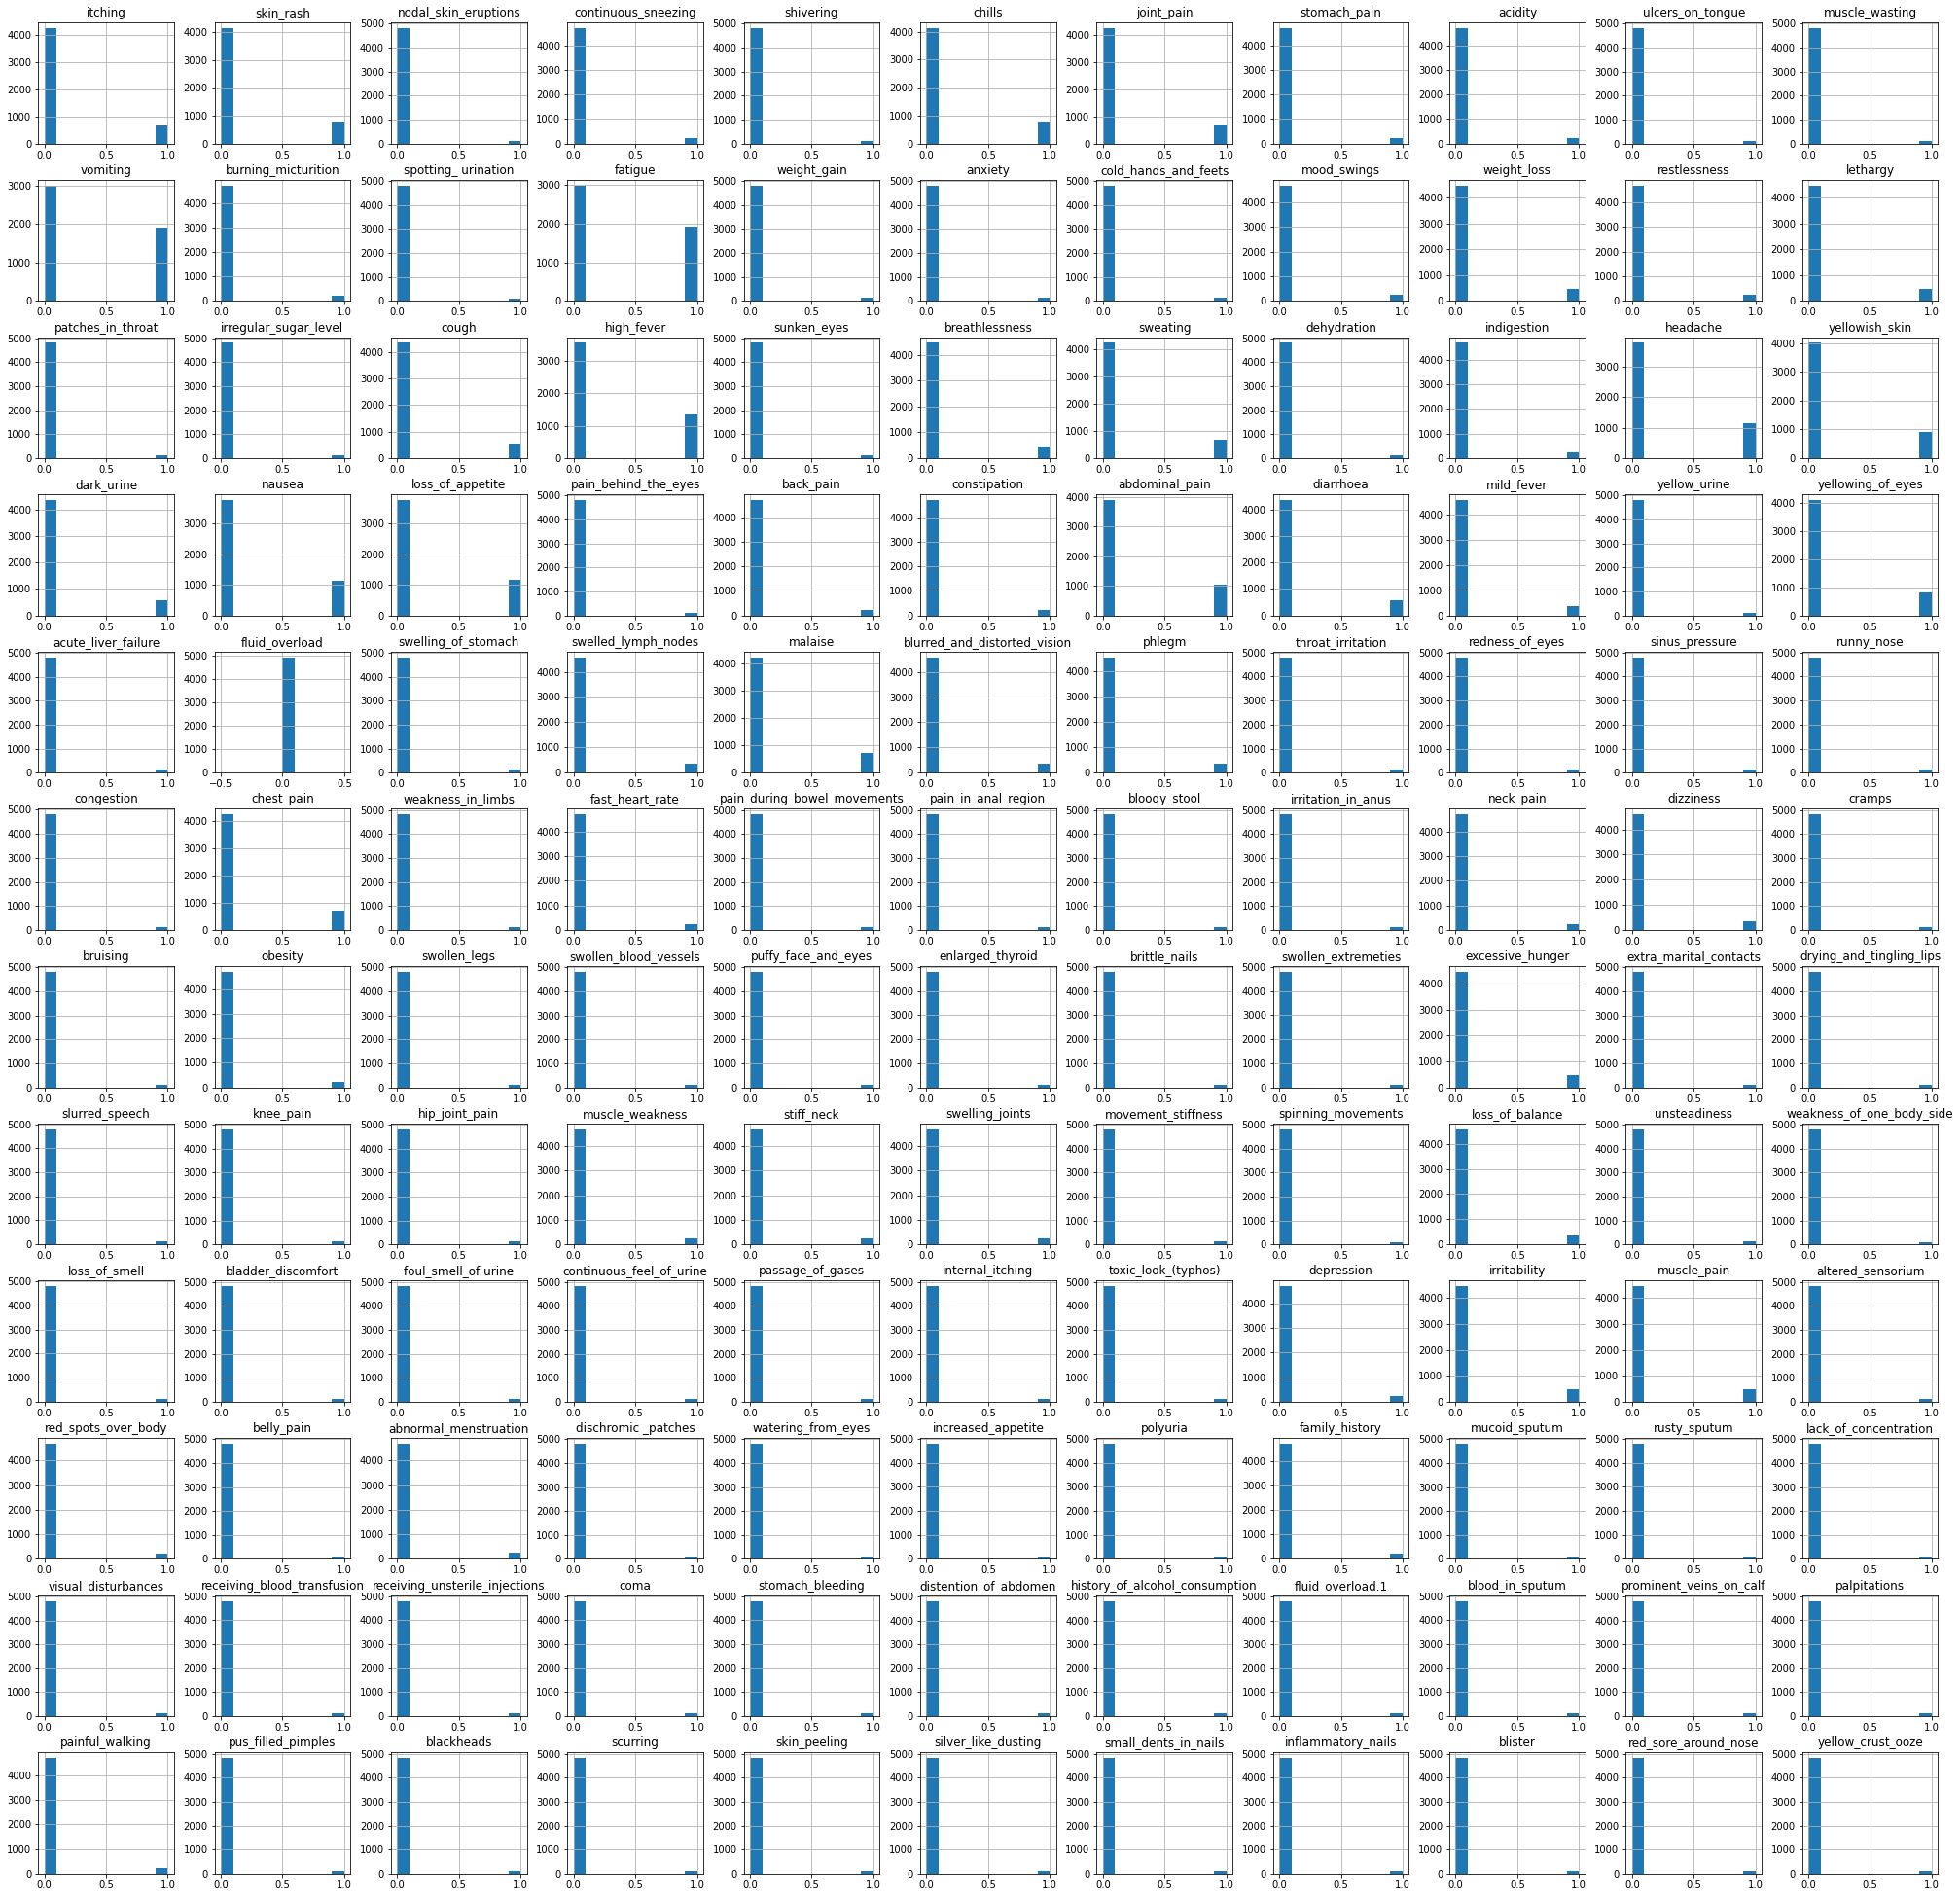

In [ ]:
df_train.hist(xlabelsize = 10, ylabelsize = 10, figsize = [35,35])#.sort_values(ascending=False)

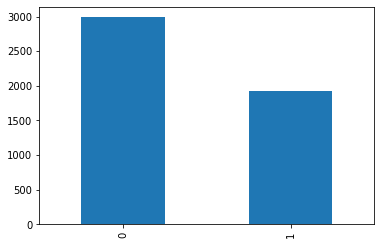

In [ ]:
df_train.fatigue.value_counts().plot(kind='bar')

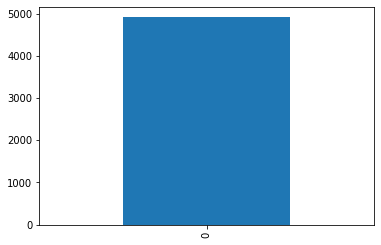

In [ ]:
df_train.fluid_overload.value_counts().plot(kind='bar')

In [ ]:
df_train.drop("fluid_overload", axis=1, inplace=True)
df_test.drop("fluid_overload", axis=1, inplace=True)

In [ ]:
df_train.mean().sort_values(ascending=False)

fatigue                      0.392683
vomiting                     0.389024
high_fever                   0.276829
loss_of_appetite             0.234146
nausea                       0.232927
                               ...   
spinning_movements           0.021951
sunken_eyes                  0.021951
weakness_of_one_body_side    0.021951
dehydration                  0.021951
foul_smell_of urine          0.020732
Length: 131, dtype: float64

In [ ]:
df_test.mean().sort_values()

bruising                    0.023810
passage_of_gases            0.023810
continuous_feel_of_urine    0.023810
foul_smell_of urine         0.023810
bladder_discomfort          0.023810
                              ...   
nausea                      0.238095
loss_of_appetite            0.238095
high_fever                  0.285714
fatigue                     0.404762
vomiting                    0.404762
Length: 131, dtype: float64

In [ ]:
X_train = df_train.drop("prognosis", axis=1)
y_train = df_train["prognosis"]
X_test = df_test.drop("prognosis", axis=1)
y_test = df_test["prognosis"]

In [ ]:
X_train.shape

(4920, 131)

In [ ]:
X_test.shape

(42, 131)

In [ ]:
y_test.shape

(42,)

In [ ]:
y_train.shape

(4920,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

Number_of_classes = Labels.size
Number_of_classes

41

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_predict = LR.predict(X_test)
Labels = LR.classes_

In [ ]:
print("Linear regression:")
print(classification_report(y_test, LR_predict, target_names=Labels))

Linear regression:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
        

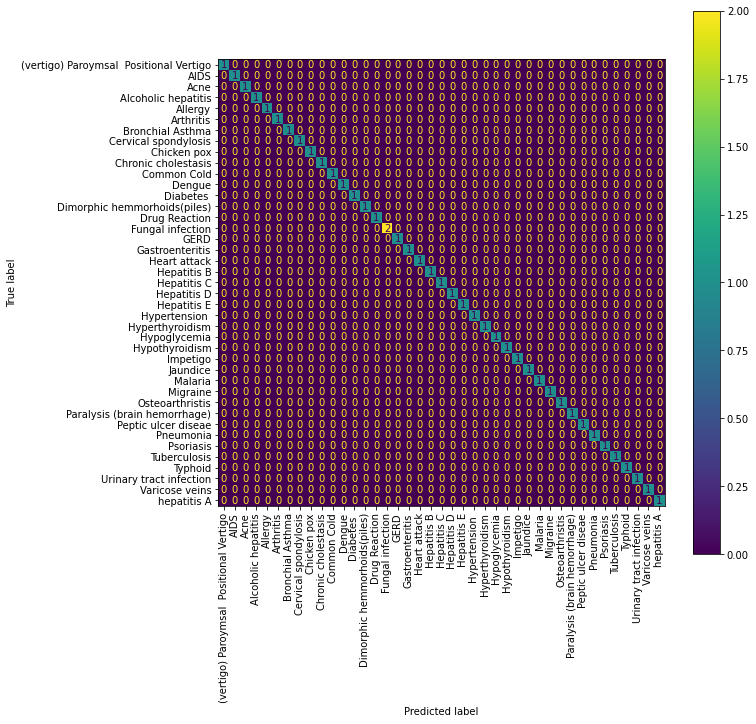

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(LR, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
SVC_L = SVC(kernel='linear')
SVC_L.fit(X_train, y_train)
SVC_L_predict = SVC_L.predict(X_test)

In [ ]:
print("SVC linear:")
print(classification_report(y_test, SVC_L_predict, target_names=Labels))

SVC linear:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
               

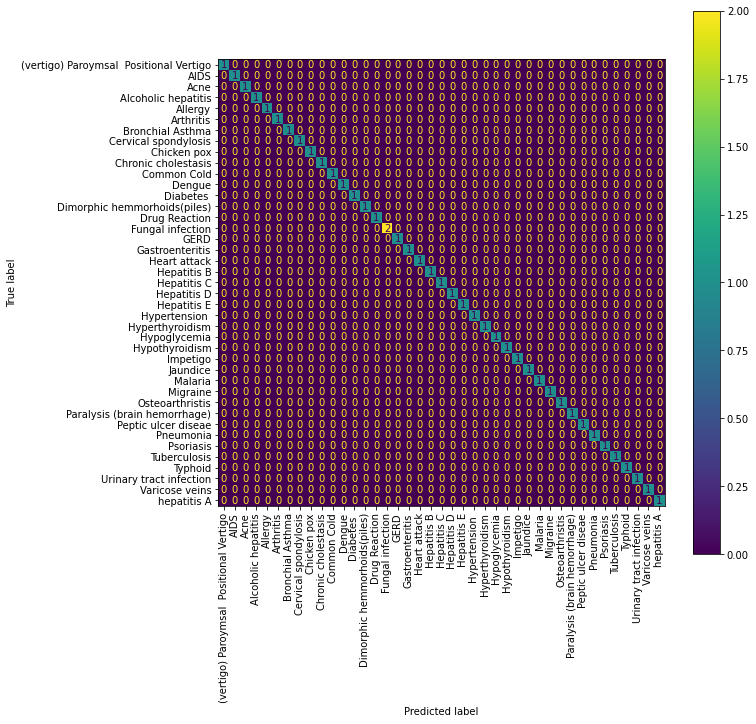

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(SVC_L, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
SVC_P = SVC(kernel='poly')
SVC_P.fit(X_train, y_train)
SVC_P_predict = SVC_L.predict(X_test)

In [ ]:
print("SVC polynomial:")
print(classification_report(y_test, SVC_P_predict, target_names=Labels))

SVC polynomial:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
           

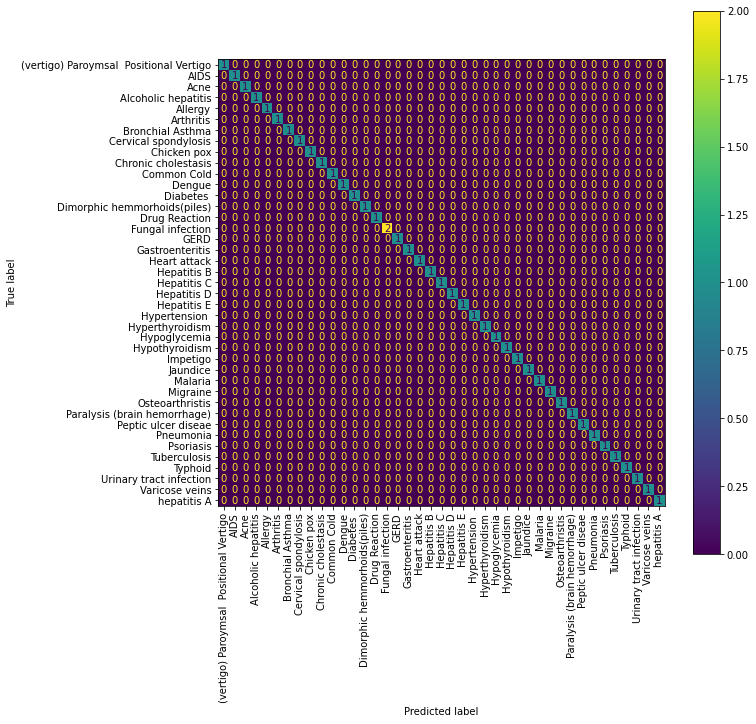

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(SVC_P, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
SVC_R = SVC(kernel='rbf')
SVC_R.fit(X_train, y_train)
SVC_R_predict = SVC_R.predict(X_test)

In [ ]:
print("SVC RBF:")
print(classification_report(y_test, SVC_R_predict, target_names=Labels))

SVC RBF:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                  

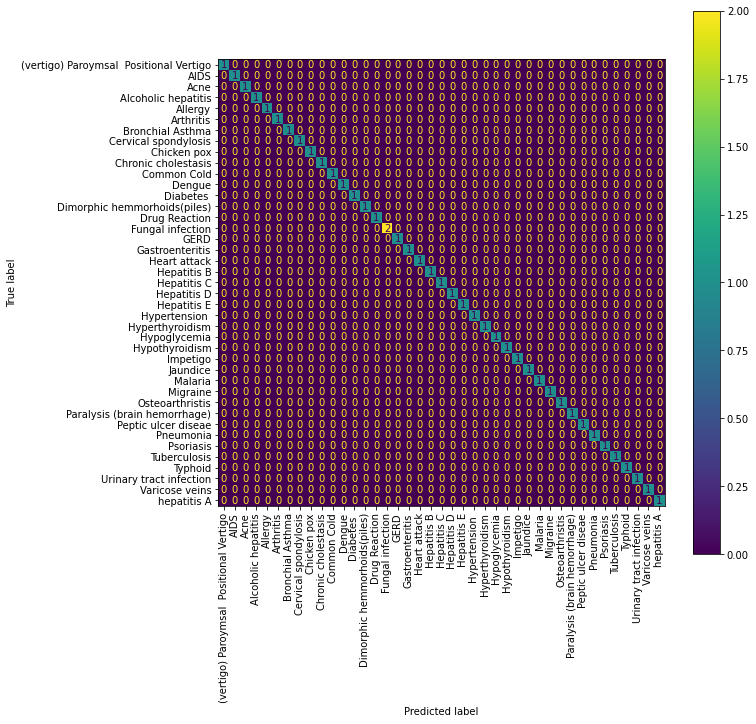

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(SVC_R, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
SVC_S = SVC(kernel='sigmoid')
SVC_S.fit(X_train, y_train)
SVC_S_predict = SVC_S.predict(X_test)

In [ ]:
print("SVC sigmoid:")
print(classification_report(y_test, SVC_S_predict, target_names=Labels))

SVC sigmoid:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
              

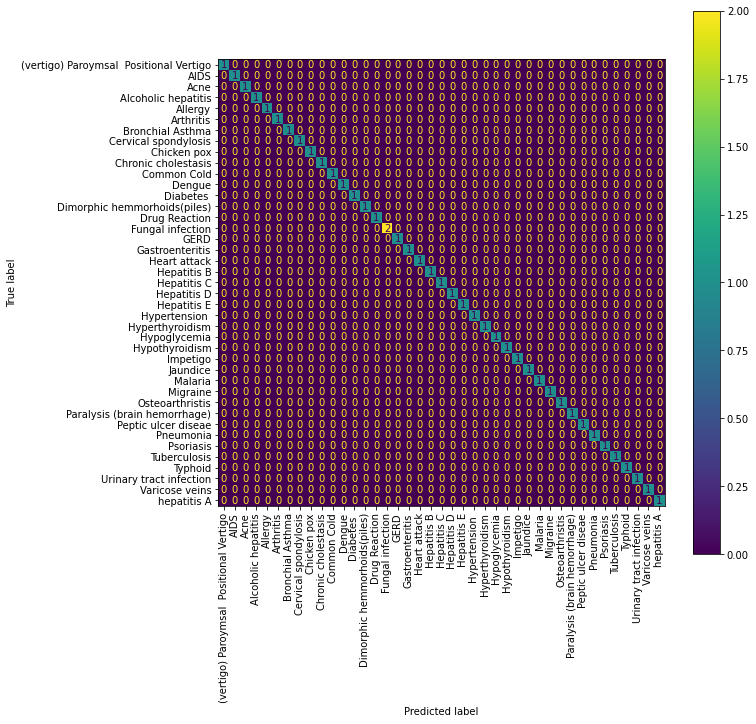

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(SVC_S, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_predict = RFC.predict(X_test)

In [ ]:
print("Random forest classiffier:")
print(classification_report(y_test, RFC_predict, target_names=Labels))

Random forest classiffier:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1


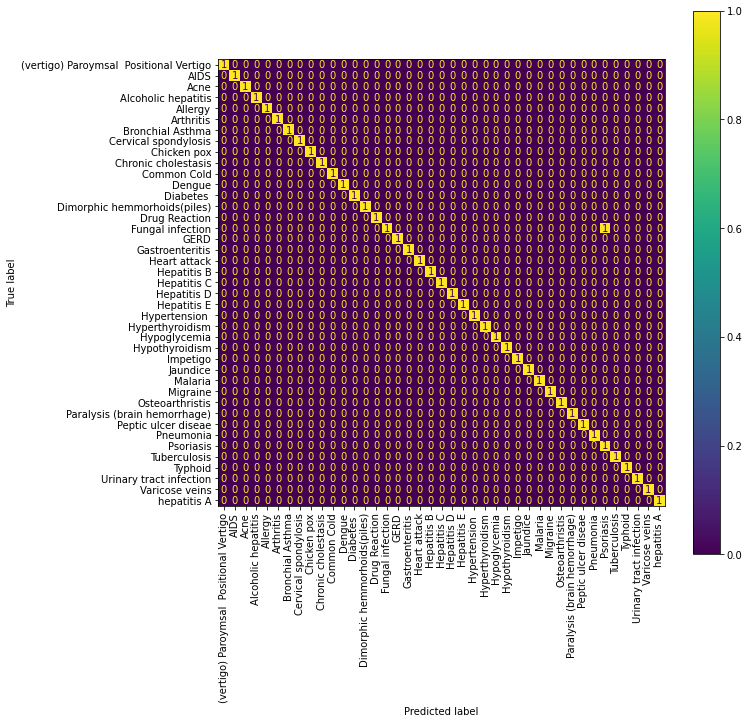

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(RFC, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)

In [ ]:
print("Gradien boosting classiffier:")
print(classification_report(y_test, GBC_predict, target_names=Labels))

Gradien boosting classiffier:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00        

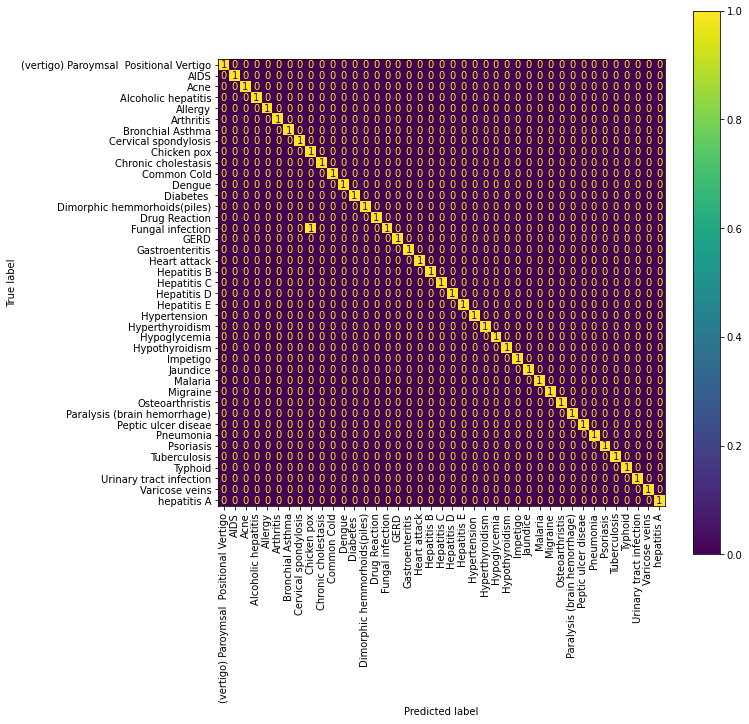

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(GBC, X_test, y_test,xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
MLPC = MLPClassifier()
MLPC.fit(X_train, y_train)
MLPC_predict = LR.predict(X_test)

In [ ]:
print("Multi-layer Perceptron classifier:")
print(classification_report(y_test, MLPC_predict, target_names=Labels))

Multi-layer Perceptron classifier:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00   

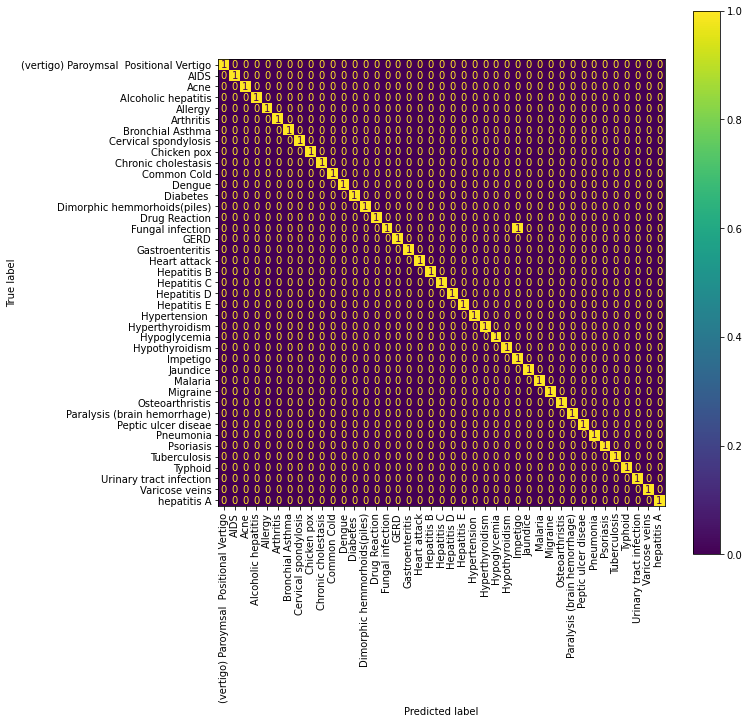

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(MLPC, X_test, y_test, xticks_rotation='vertical', ax = ax)
plt.show()

In [ ]:
input_size = X_train.shape[1]

In [ ]:
y_test.shape

(42,)

In [ ]:
y_train.values

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
import tensorflow as tf

from sklearn import preprocessing

import random
import numpy as np

In [ ]:
X_train_tens = tf.convert_to_tensor(X_train)
X_test_tens = tf.convert_to_tensor(X_test)

# print X_data Tensors

In [ ]:
print(X_train)
print()
print(X_train_tens)
print("========")
print(X_test)
print()
print(X_test_tens)

      itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0           1          1  ...                     0                  0
1           0          1  ...                     0                  0
2           1          0  ...                     0                  0
3           1          1  ...                     0                  0
4           1          1  ...                     0                  0
...       ...        ...  ...                   ...                ...
4915        0          0  ...                     0                  0
4916        0          1  ...                     0                  0
4917        0          0  ...                     0                  0
4918        0          1  ...                     0                  0
4919        0          1  ...                     1                  1

[4920 rows x 131 columns]

tf.Tensor(
[[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 .

# convert y_data to Tensors

In [ ]:
y_train_tens = tf.convert_to_tensor(pd.get_dummies(y_train))
y_test_tens = tf.convert_to_tensor(pd.get_dummies(y_test))

# print y_data Tensors

In [ ]:
#with np.printoptions(threshold=np.inf):
print(y_train_tens)
print()
print(y_test_tens)

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(4920, 41), dtype=uint8)

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(42, 41), dtype=uint8)


# My model of neural network:

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_size, activation='relu', input_shape=[number_of_pixels]))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(input_size/3, activation='relu', input_shape=[number_of_pixels/3]))
model.add(tf.keras.layers.Dense(Number_of_classes, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 131)               17292     
_________________________________________________________________
dropout_9 (Dropout)          (None, 131)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 43)                5676      
_________________________________________________________________
dense_33 (Dense)             (None, 41)                1804      
Total params: 24,772
Trainable params: 24,772
Non-trainable params: 0
_________________________________________________________________


# Training model of neural network:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_tens, y_train_tens, validation_data=(X_test_tens, y_test_tens), epochs=10, verbose=1)

Epoch 1/10
154/154 [==============================] - 1s 3ms/step - loss: 1.9297 - accuracy: 0.6831 - val_loss: 0.1736 - val_accuracy: 1.0000
Epoch 2/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9996 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 3/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 4/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 5/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 6/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 7/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 

# Visualise dependence of accuracy and loss function on the epoch number:

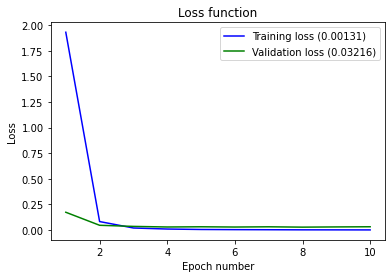

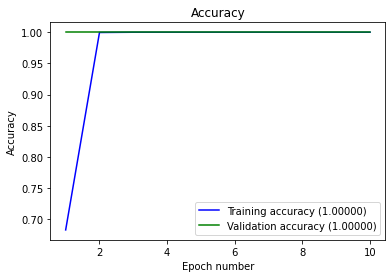

In [ ]:
epochs = range(1,len(history.history[['loss'][0]]) + 1)

## Loss
plt.figure(1)
plt.plot(epochs, history.history['loss'], 'blue', label='Training loss (' + str(str(format(history.history['loss'][-1],'.5f'))+')'))
plt.plot(epochs, history.history['val_loss'], 'green', label='Validation loss (' + str(str(format(history.history['val_loss'][-1],'.5f'))+')'))
plt.title('Loss function')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()

## Accuracy
plt.figure(2)
plt.plot(epochs, history.history['accuracy'], 'blue', label='Training accuracy (' + str(format(history.history['accuracy'][-1],'.5f'))+')')
plt.plot(epochs, history.history['val_accuracy'], 'green', label='Validation accuracy (' + str(format(history.history['val_accuracy'][-1],'.5f'))+')')
plt.title('Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()

plt.show()